In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [120]:
def MetroSweep(lattice,J,B):
    for j in range(n):
        for i in range(n):
            #Energy of site i,j  
            Ei = -J*lattice[(i)%n][(j)%n]*(lattice[(i+1)%n][(j)%n]+lattice[(i-1)%n][(j)%n]+lattice[(i)%n][(j+1)%n]+lattice[(i)%n][(j-1)%n])
            #Energy of site i,j if flipped
            Ef = -Ei
            #Change in energy
            delE = Ef - Ei
            
            if delE <= 0:
                lattice[i%n][j%n] = -lattice[i%n][j%n]
            elif random.random() < np.exp(-B*delE):          
                    lattice[i%n][j%n] = -lattice[i%n][j%n]
            #Record energy
            E[i%n][j%n] = -J*lattice[(i)%n][(j)%n]*(lattice[(i+1)%n][(j)%n]+lattice[(i-1)%n][(j)%n]+lattice[(i)%n][(j+1)%n]+lattice[(i)%n][(j-1)%n])       
    return lattice      

In [121]:
def RunMetroSweep(t,n,B,J):
    #Generate random initial configuration
    lattice = 2*np.random.randint(0,2,(n,n))-1;
    E = np.zeros((n,n))
    for k in range(t):   
        lattice = MetroSweep(lattice, J, B)
    m = np.sum(lattice)
    SumLat = np.sum(lattice)**2
    return m, SumLat   

In [122]:
#Define variables
J = 1
k = 1
T = np.arange(0.1,4.1,0.1)
B = 1/(k*T)
n=20
t = 50
M = []
X = []

In [123]:
for i in range(T.size):
    (m,SumLat) = RunMetroSweep(t,n,B[i],J)
    M.append(np.abs(m))
    X.append(SumLat/(n*n)-m**2/(n*n))


NameError: name 'E' is not defined

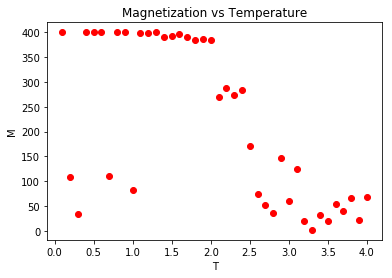

In [118]:
plt.plot(T,M,'ro')
plt.title('Magnetization vs Temperature')
plt.ylabel("M")
plt.xlabel("T")
plt.show()

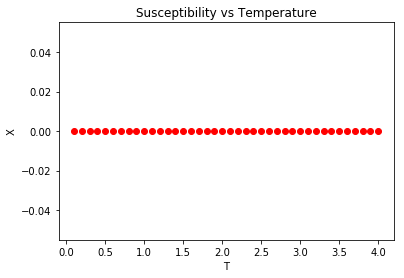

In [119]:
plt.plot(T,X,'ro')
plt.title('Susceptibility vs Temperature')
plt.ylabel("X")
plt.xlabel("T")
plt.show()